Source:
https://www.youtube.com/watch?v=VDzrvhgyxsU

In [1]:
import numpy as np
import sympy
import networkx as nx
import matplotlib.pyplot as plt
from misc_tools.print_latex import print_tex
from IPython.display import Latex

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

In [2]:
def pad_matrix(input, top, side):
    sol = np.hstack((np.array([side]).T, input))
    sol = np.vstack((['X'] + top, sol))
    return sympy.Matrix(sol)

## Generate graph from edges and nodes
* create list of nodes `nodes`
* create edges, where node $n_i$ connects with N random nodes from `nodes` and has random weight

In [3]:
np.random.seed(1)
NUM_NODES = 4

G = nx.Graph()
nodes = [f'$n_{i}$' for i in range(1, NUM_NODES + 1)]
nodes_trim = [n[1:-1] for n in nodes] 
edges = [(n1, n2, np.random.randint(1,11)) 
         for n1 in nodes 
         for n2 in np.random.choice(nodes, np.random.randint(1, NUM_NODES))]

G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

G2 = nx.DiGraph()
G2.add_nodes_from(nodes)
G2.add_weighted_edges_from(edges)

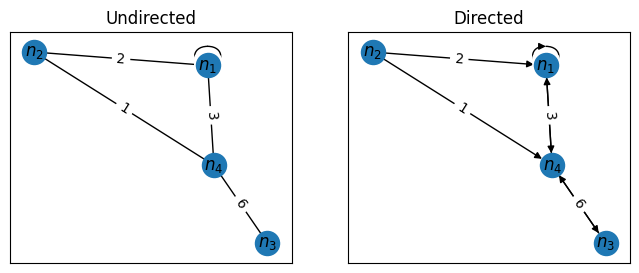

In [4]:
fig, axs = plt.subplots(1,2, figsize = (8,3))
pos = nx.spring_layout(G, seed=1)

edge_labels = nx.get_edge_attributes(G, "weight")
for graph, ax, title in zip([G,G2], axs, ['Undirected', 'Directed']):
    nx.draw_networkx(graph, pos, ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax = ax);
    ax.set_title(title)

## Adjacency matrix (A)
Unweighted matrix shows which nodes are connected via entry at index `i,j` from  `(nodes[i], nodes[j])`.
* 1 - connected
* 0 - no edge

Weighted matrix shows weights instead of mask.<br>
_0 weight $\leftrightarrow$ no edge_

For **undirected** graph, matrices will be **symmetric**. 

In fact, on simple undirected graph, since there is no forward and reverse edge, you overwrite weights on shared edge.

In [5]:
# notice edge weights between nodes 1 and 4 have different values. Only last is applied.
edges_trim = [f'$('+','.join(e[:2]).replace('$', '') + ')$: '+ str(e[-1]) for i,e in enumerate(edges)]
display(Latex('; '.join(edges_trim)))
A = nx.adjacency_matrix(G, weight=None)
display(pad_matrix(A.todense(), nodes_trim, nodes_trim))

A2 = nx.adjacency_matrix(G, weight='weight')
pad_matrix(A2.todense(), nodes_trim, nodes_trim)

<IPython.core.display.Latex object>

Matrix([
[  X, n_1, n_2, n_3, n_4],
[n_1,   1,   1,   0,   1],
[n_2,   1,   0,   0,   1],
[n_3,   0,   0,   0,   1],
[n_4,   1,   1,   1,   0]])

Matrix([
[  X, n_1, n_2, n_3, n_4],
[n_1,  10,   2,   0,   3],
[n_2,   2,   0,   0,   1],
[n_3,   0,   0,   0,   6],
[n_4,   3,   1,   6,   0]])

For **directed** graph, matrices will be **non-symmetric**

In [6]:
A3 = nx.adjacency_matrix(G2, weight='weight')
pad_matrix(A3.todense(), nodes_trim, nodes_trim)

Matrix([
[  X, n_1, n_2, n_3, n_4],
[n_1,  10,   0,   0,   9],
[n_2,   2,   0,   0,   1],
[n_3,   0,   0,   0,   7],
[n_4,   3,   0,   6,   0]])

## Incidence matrix
In oriented and weighted mode shows connectivity via  indices `i,j` from  `(nodes[i], edges[j])`.

Sign indicates direction of an edge. 
* negative -  edge 'left' a node
* positive - other node 'received' an edge

In [7]:
IM = nx.incidence_matrix(G2, weight='weight', oriented=True).todense()
edges_trim = [f'$e_{i}:('+','.join(e[:2]).replace('$', '') + ')$: '+ str(e[-1]) for i,e in enumerate(edges)]
display(Latex('; '.join(edges_trim)))
# edges_trim = np.array(edges_trim, dtype=str)
edges_trim = [f'e_{i}' for i,_ in enumerate(edges)]
pad_matrix(IM, edges_trim, nodes_trim)

<IPython.core.display.Latex object>

Matrix([
[  X,  e_0, e_1,  e_2,  e_3,  e_4,  e_5,  e_6],
[n_1, -9.0,   0,    0,  2.0,    0,    0,  3.0],
[n_2,    0,   0, -1.0, -2.0,    0,    0,    0],
[n_3,    0,   0,    0,    0, -7.0,  6.0,    0],
[n_4,  9.0,   0,  1.0,    0,  7.0, -6.0, -3.0]])

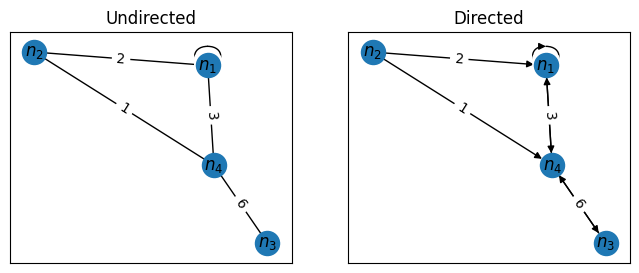

In [8]:
fig, axs = plt.subplots(1,2, figsize = (8,3))
for graph, ax, title in zip([G,G2], axs, ['Undirected', 'Directed']):
    nx.draw_networkx(graph, pos, ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax = ax);
    ax.set_title(title)


## Degree and degree matrix (D)
Node degree shows gives a number connected edges to a node.

Few notes:
* `undirected` edges connect one neighbor;
* `directed` edges connect neighbors independent of edge direction;
* `self-edges` are connecting self to self, but add +2 to degree for both undirected and directed edges;
* Probably  because it is swap invariant (self, self) = (self, self) in both cases

In the example below node $n_3$ has degree of 1 on undirected and 2 on directed graph (count arrows).
node $n_1$ has degree of 4 on undirected graph (2 self + 2 undir edges) and 5 on directed graph (2 self + 3 dir edges)


In [9]:
print(nx.degree(G))
print(nx.degree(G2))
print_tex('D = ', np.diag([a[1] for a in nx.degree(G)]))

[('$n_1$', 4), ('$n_2$', 2), ('$n_3$', 1), ('$n_4$', 3)]
[('$n_1$', 5), ('$n_2$', 2), ('$n_3$', 2), ('$n_4$', 5)]


<IPython.core.display.Math object>

## Laplatian matrix
$$L = \{D - A\}$$

Degree matrix of a graph (by https://arxiv.org/pdf/1609.02907.pdf)

In [10]:
D = np.zeros_like(A)
for i in range(n):
    for j in range(n):
        D[i,i] += A[i,j]
D

NameError: name 'n' is not defined

In [ ]:
np.random.choice([1,2,3],2)

array([1, 3])